<a href="https://colab.research.google.com/github/meghorikawa/LangDev/blob/main/DataHandling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
# imports

import pandas as pd
import os
import plotnine
from scipy.stats import pearsonr

from plotnine import (
    ggplot,
    aes,
    geom_boxplot,
    labs,
    theme_bw,
    theme,
    element_text

)


file_path = '/content/drive/MyDrive/Language Development/participantData.csv'

df = pd.read_csv(file_path)
df = df.drop(columns=['Unnamed: 0'])
df.head()

,name,J-cat Score,Sentence Length,Clause Length,Clauses per Sentence,CC Freq,SC Freq,CTTR
0,CCH08,253,11.685020,6.863170,1.530010,1.005964,6.373856,5.072711
1,CCH09,294,14.821699,9.006358,1.588041,0.635268,7.636480,4.811543
2,CCH11,261,14.687897,9.284722,1.620833,0.306946,5.700219,5.026260
3,CCH12,282,15.365694,8.011389,1.729028,0.064267,6.204277,4.938965
4,CCH13,227,15.059396,9.565159,1.544387,0.742697,7.058873,5.076454


In [19]:
# method to classify by proficentcy level and add column

def determine_proficiency(score):
    if score < 100:
        return 'Basic'
    elif 100 <= score < 150:
        return 'Pre-Intermediate'
    elif 150 <= score < 200:
        return 'Intermediate'
    elif 200 <= score < 250:
        return 'Intermediate High'
    elif 250 <= score < 300:
        return 'Pre-Advanced'
    elif 300 <= score < 999:
        return 'Advanced'
    elif score == 999:
        return 'Native'
    else:
        return 'Unknown'

# Apply the function to create a new column 'Proficiency Level'
df['Proficiency Level'] = df['J-cat Score'].apply(determine_proficiency)
df.head()

,name,J-cat Score,Sentence Length,Clause Length,Clauses per Sentence,CC Freq,SC Freq,CTTR,Proficiency Level
0,CCH08,253,11.685020,6.863170,1.530010,1.005964,6.373856,5.072711,Pre-Advanced
1,CCH09,294,14.821699,9.006358,1.588041,0.635268,7.636480,4.811543,Pre-Advanced
2,CCH11,261,14.687897,9.284722,1.620833,0.306946,5.700219,5.026260,Pre-Advanced
3,CCH12,282,15.365694,8.011389,1.729028,0.064267,6.204277,4.938965,Pre-Advanced
4,CCH13,227,15.059396,9.565159,1.544387,0.742697,7.058873,5.076454,Intermediate High


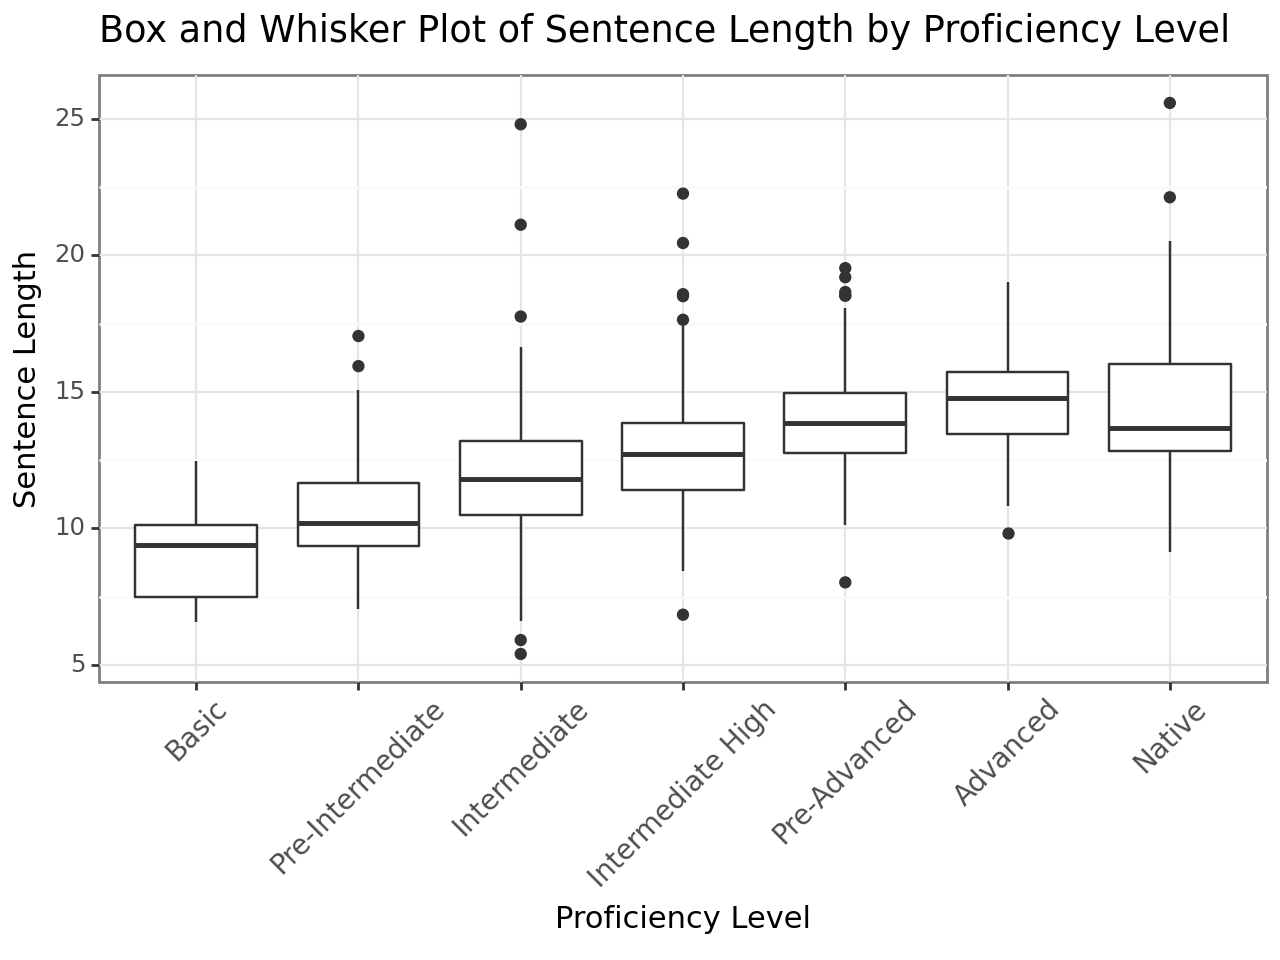

In [20]:
# box and wisker plots for each criteria

#oder proficiency levels:
proficiency_order = [
    'Basic', 'Pre-Intermediate', 'Intermediate',
    'Intermediate High', 'Pre-Advanced', 'Advanced', 'Native'
]

# convert prof level to categorical variable
df['Proficiency Level'] = pd.Categorical(df['Proficiency Level'], categories=proficiency_order, ordered=True)

# sent length
plot = (
    ggplot(df, aes(x='Proficiency Level', y='Sentence Length'))
    + geom_boxplot()
    + labs(x='Proficiency Level', y='Sentence Length', title='Box and Whisker Plot of Sentence Length by Proficiency Level')
    + theme_bw()
    + theme(axis_text_x=element_text(angle=45, hjust=.5, size=10))
)

print(plot)


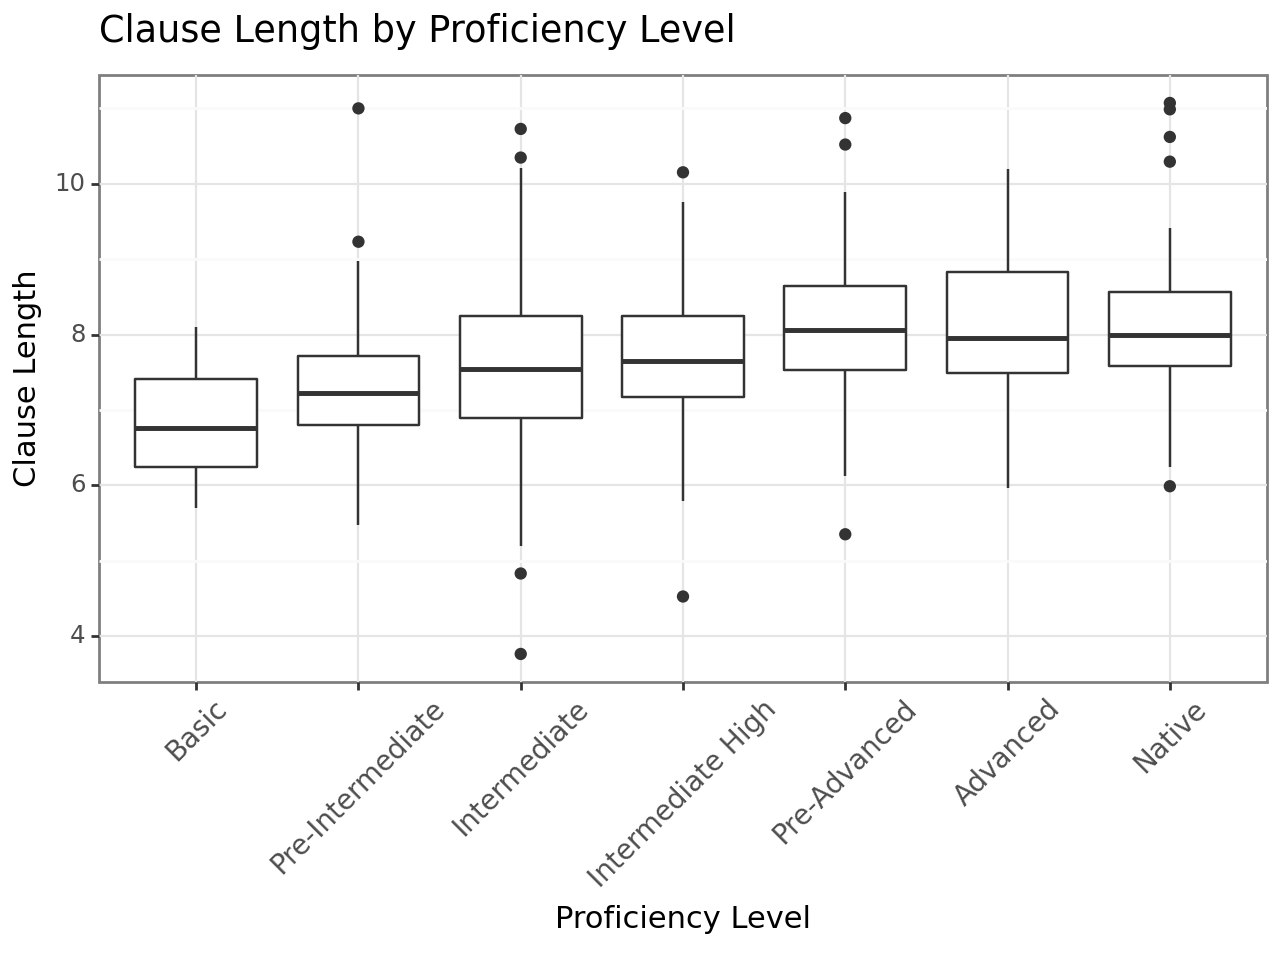

In [21]:
# clause length length
plot = (
    ggplot(df, aes(x='Proficiency Level', y='Clause Length'))
    + geom_boxplot()
    + labs(x='Proficiency Level', y='Clause Length', title='Clause Length by Proficiency Level')
    + theme_bw()
    + theme(axis_text_x=element_text(angle=45, hjust=.5, size=10))
)

print(plot)

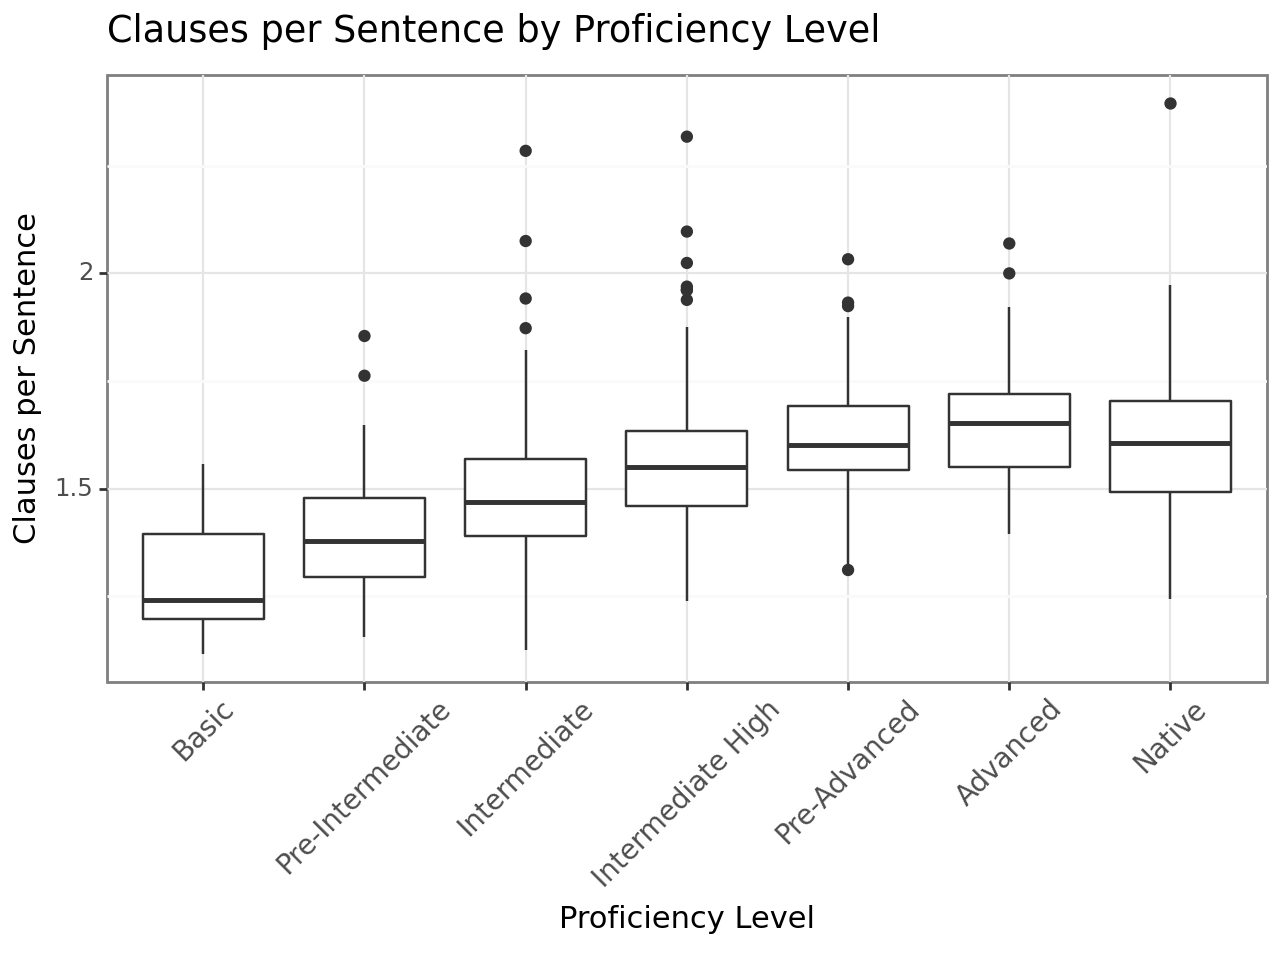

In [22]:
# clause per sentences
plot = (
    ggplot(df, aes(x='Proficiency Level', y='Clauses per Sentence'))
    + geom_boxplot()
    + labs(x='Proficiency Level', y='Clauses per Sentence', title='Clauses per Sentence by Proficiency Level')
    + theme_bw()
    + theme(axis_text_x=element_text(angle=45, hjust=.5, size=10))
)

print(plot)


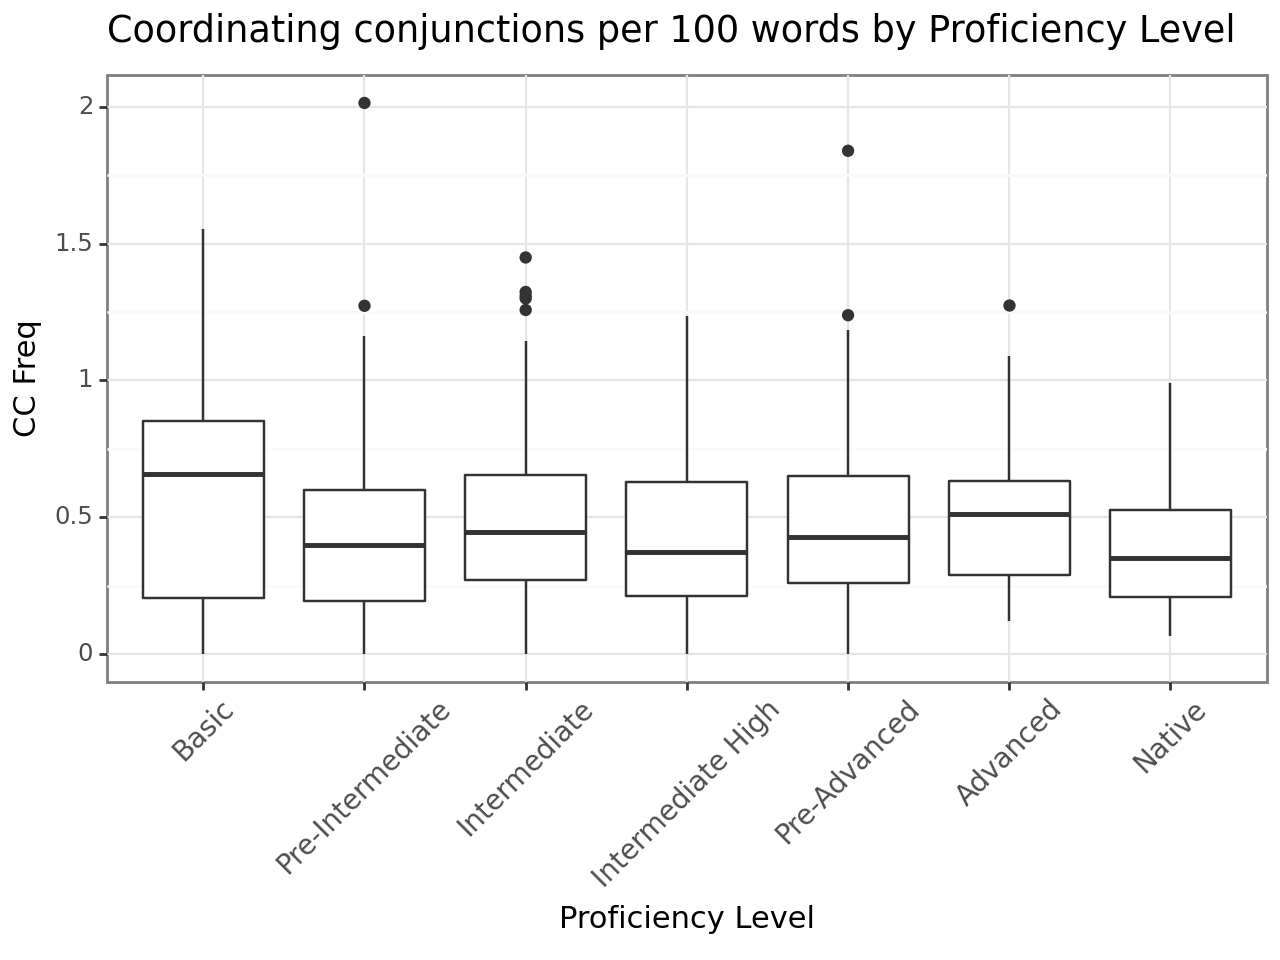

In [23]:
#CC frequency
plot = (
    ggplot(df, aes(x='Proficiency Level', y='CC Freq'))
    + geom_boxplot()
    + labs(x='Proficiency Level', y='CC Freq', title='Coordinating conjunctions per 100 words by Proficiency Level')
    + theme_bw()
    + theme(axis_text_x=element_text(angle=45, hjust=.5, size=10))
)

print(plot)


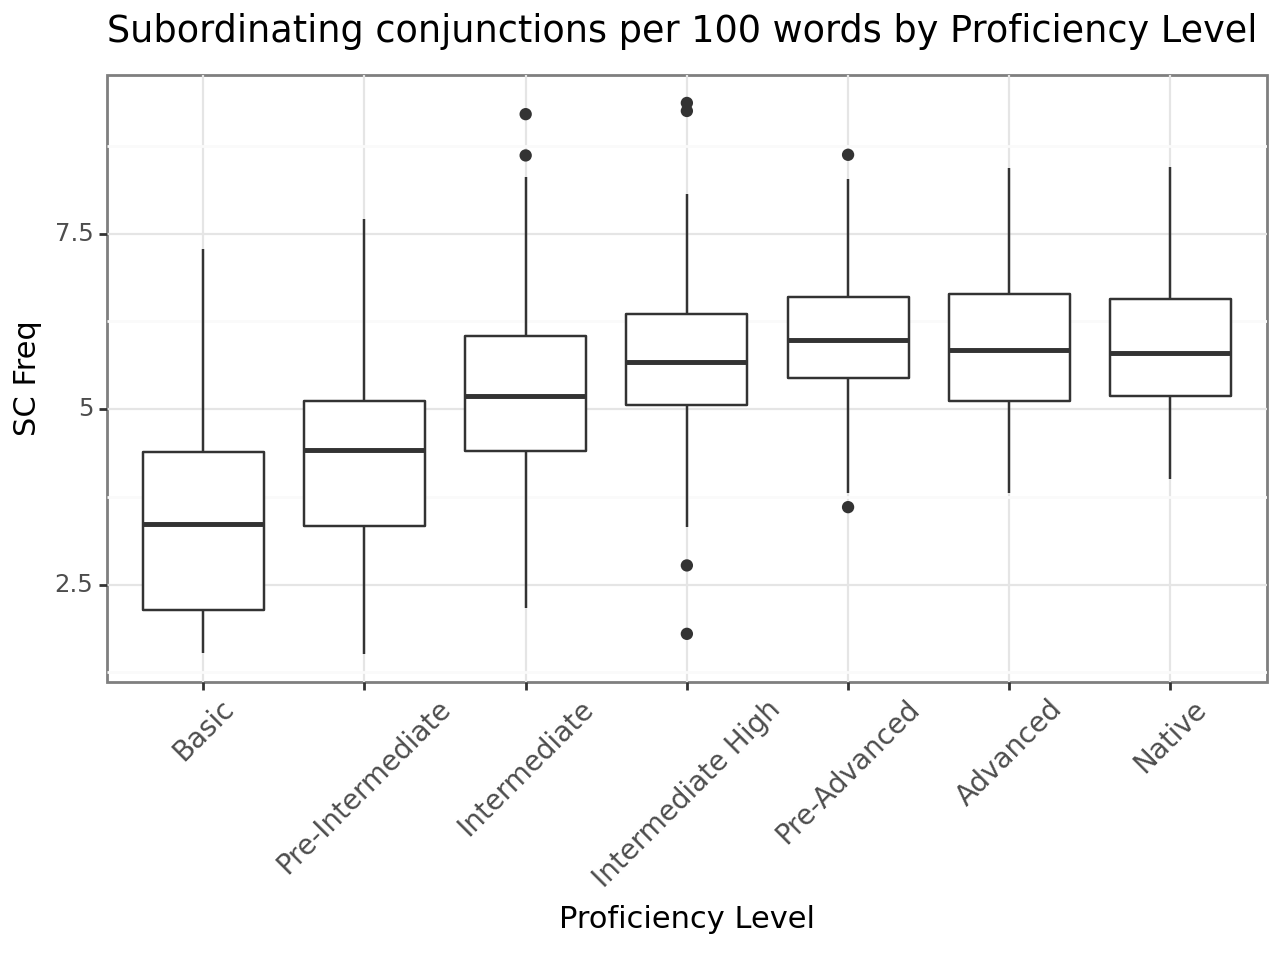

In [24]:
#SC frequency
plot = (
    ggplot(df, aes(x='Proficiency Level', y='SC Freq'))
    + geom_boxplot()
    + labs(x='Proficiency Level', y='SC Freq', title='Subordinating conjunctions per 100 words by Proficiency Level')
    + theme_bw()
    + theme(axis_text_x=element_text(angle=45, hjust=.5, size=10))
)

print(plot)

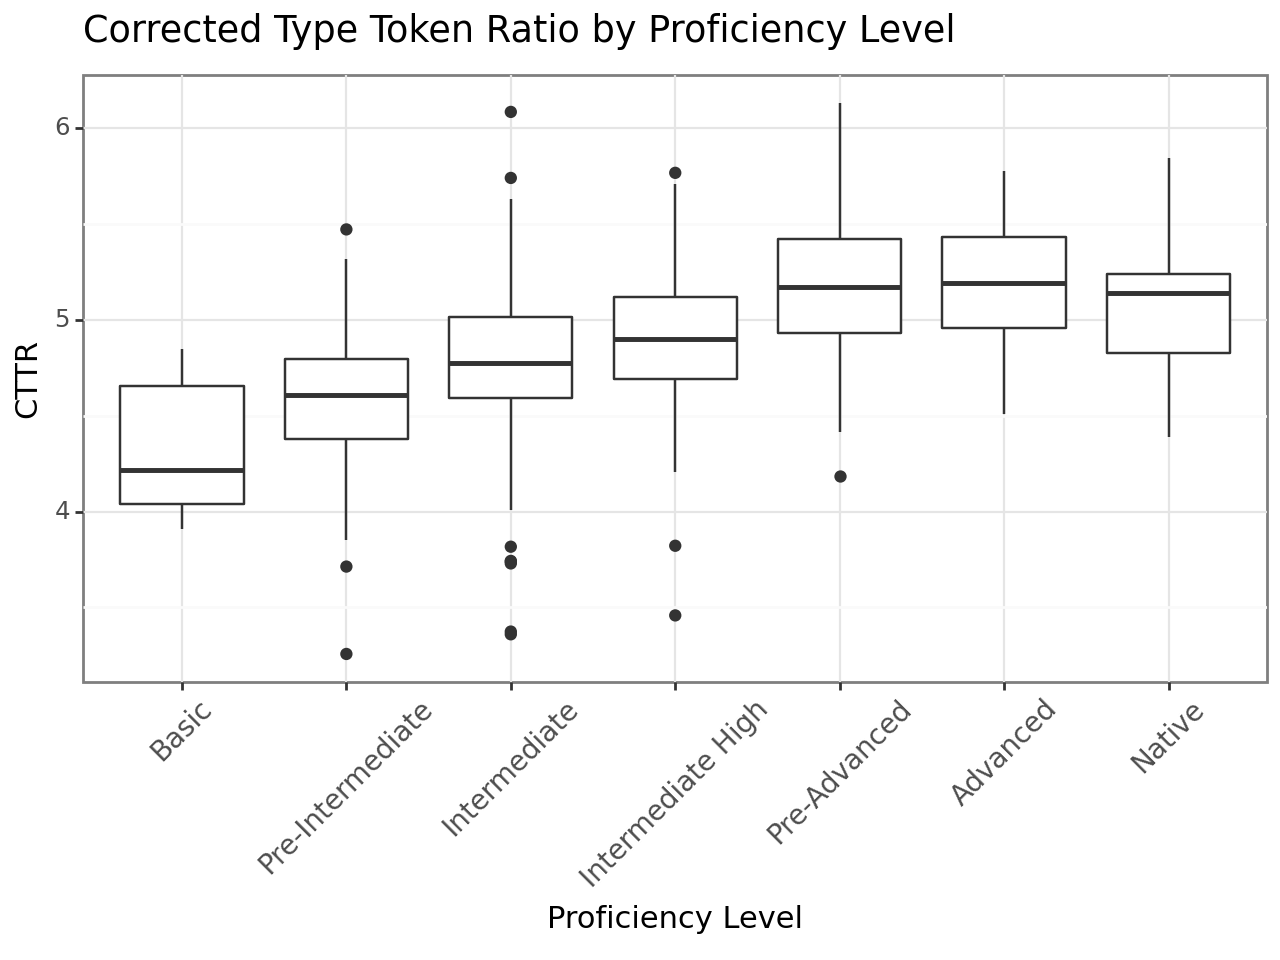

In [25]:
#CTTR frequency Corrected Type Token Ratio
plot = (
    ggplot(df, aes(x='Proficiency Level', y='CTTR'))
    + geom_boxplot()
    + labs(x='Proficiency Level', y='CTTR', title='Corrected Type Token Ratio by Proficiency Level')
    + theme_bw()
    + theme(axis_text_x=element_text(angle=45, hjust=.5, size=10))
)

print(plot)

In [26]:
# Next need the correlation coefficent with the other values.


In [27]:
 proficiency_mapping = {
    'Basic': 1,
    'Pre-Intermediate': 2,
    'Intermediate': 3,
    'Intermediate High': 4,
    'Pre-Advanced': 5,
    'Advanced': 6,
    'Native': 7
}


df['Proficiency Level Numeric'] = df['Proficiency Level'].map(proficiency_mapping)


df.drop(columns=['name', 'Proficiency Level']).corr()

,J-cat Score,Sentence Length,Clause Length,Clauses per Sentence,CC Freq,SC Freq,CTTR,Proficiency Level Numeric
J-cat Score,1.000000,0.317826,0.191256,0.251927,-0.060584,0.201115,0.248633,0.787632
Sentence Length,0.317826,1.000000,0.752342,0.866448,0.036716,0.473458,0.579428,0.480527
Clause Length,0.191256,0.752342,1.000000,0.398998,0.162845,0.178347,0.507356,0.280131
Clauses per Sentence,0.251927,0.866448,0.398998,1.000000,-0.041037,0.558392,0.512895,0.439391
CC Freq,-0.060584,0.036716,0.162845,-0.041037,1.000000,-0.110416,0.104467,-0.055630
SC Freq,0.201115,0.473458,0.178347,0.558392,-0.110416,1.000000,0.306436,0.383949
CTTR,0.248633,0.579428,0.507356,0.512895,0.104467,0.306436,1.000000,0.449197
Proficiency Level Numeric,0.787632,0.480527,0.280131,0.439391,-0.055630,0.383949,0.449197,1.000000
